# Subtask 1: Logdata parsing

Research on weapons and bots. The data used for this analysis is a log from one game, 100 rounds. Game was played locally, the bots' versions are as were on Monday 17/10/2022.



In [360]:
import os 
import json
import pandas as pd
import matplotlib.pyplot as plt

In [361]:
logfilename = "results/gupb__2022_10_20_20_11_04.log"

file = open(logfilename, "r")
data = []
order = ["date", "type", "element", "message"]

for line in file.readlines():
    details = line.split("|")
    details = [x.strip() for x in details]
    structure = {key:value for key, value in zip(order, details)}
    data.append(structure)

df=pd.DataFrame(data)

df.head()


,date,type,element,message
0,"2022-10-20 20:12:45,120",INFO,runner.run:40,Starting game number 1.
1,"2022-10-20 20:12:45,121",DEBUG,runner.run_game:47,Randomly picked arena: generated_9.
2,"2022-10-20 20:12:45,125",DEBUG,arenas.spawn_menhir:126,"Menhir spawned at Coords(x=20, y=17)."
3,"2022-10-20 20:12:45,199",DEBUG,games._spawn_champions:79,Blue champion for IntercontinentalBajers spawn...
4,"2022-10-20 20:12:45,200",DEBUG,games._spawn_champions:79,"Red champion for Killer spawned at Coords(x=8,..."


### 1. Warnings - who is the most "dangerous" bot? 

In [362]:
warning_df = df[df['type']=="WARNING"]

warning_df[['object','name','log']]=warning_df['message'].str.split(' ', 2, expand=True)

warning_df.head()

/var/folders/0j/jndg8f256sv9t35cz406vsjc0000gn/T/ipykernel_48625/928938311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warning_df[['object','name','log']]=warning_df['message'].str.split(' ', 2, expand=True)
/var/folders/0j/jndg8f256sv9t35cz406vsjc0000gn/T/ipykernel_48625/928938311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warning_df[['object','name','log']]=warning_df['message'].str.split(' ', 2, expand=True)
/var/folders/0j/jndg8f256sv9t35cz406vsjc0000gn/T/ipykernel_48625/928938311.py:3:

,date,type,element,message,object,name,log
17,"2022-10-20 20:12:45,231",WARNING,characters.pick_action:112,Controller Spejson throw an unexpected excepti...,Controller,Spejson,throw an unexpected exception: IndexError('ind...
21,"2022-10-20 20:12:45,249",WARNING,characters.pick_action:112,Controller MemeControllerSnieznyKockodan throw...,Controller,MemeControllerSnieznyKockodan,throw an unexpected exception: IndexError('lis...
44,"2022-10-20 20:12:45,284",WARNING,characters.pick_action:112,Controller Spejson throw an unexpected excepti...,Controller,Spejson,throw an unexpected exception: IndexError('ind...
48,"2022-10-20 20:12:45,285",WARNING,characters.pick_action:112,Controller MemeControllerSnieznyKockodan throw...,Controller,MemeControllerSnieznyKockodan,throw an unexpected exception: IndexError('lis...
54,"2022-10-20 20:12:45,288",WARNING,characters.pick_action:112,Controller NobleControllerMarko throw an unexp...,Controller,NobleControllerMarko,throw an unexpected exception: AttributeError(...


In [363]:
warning_df.groupby(['name'], as_index=False).size()


,name,size
0,DodgeControllerElvis,2319
1,DzikiControllerDzikieBorsuki,113
2,MemeControllerSnieznyKockodan,1661
3,NobleControllerMarko,2477
4,ShrekControllerFiona,2540
5,Spejson,2322


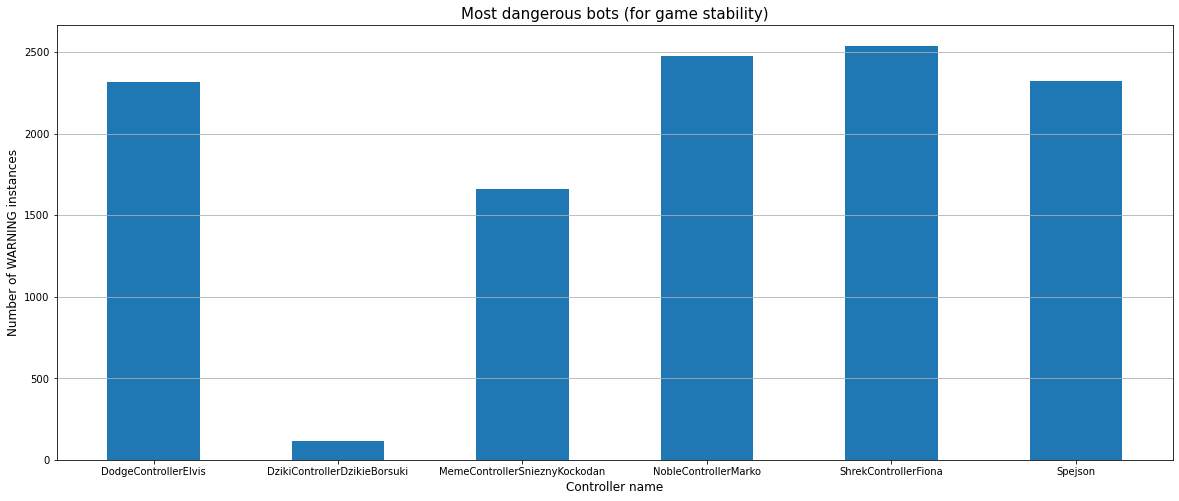

In [364]:
fig, ax = plt.subplots(figsize=(20,8))

warn_df = warning_df.groupby(['name'], as_index=False).size()

ax.bar(warn_df["name"], warn_df["size"], width=0.5)

ax.set_xlabel("Controller name",fontsize=12)
ax.set_ylabel("Number of WARNING instances",fontsize=12)
ax.set_title("Most dangerous bots (for game stability)", fontsize=15)
ax.grid(axis='y')
plt.show()

### 2. Benadrylowy Barabasz - weapon statistics

In [365]:
df[['object','name','log']]=df['message'].str.split(' ', 2, expand=True)

barabasz_df = df[df['name']=='BenadrylowyBarabasz']

In [366]:
barabasz_df.head()

,date,type,element,message,object,name,log
29,"2022-10-20 20:12:45,254",DEBUG,characters.act:79,Champion BenadrylowyBarabasz picked action Act...,Champion,BenadrylowyBarabasz,picked action Action.TURN_LEFT.
30,"2022-10-20 20:12:45,254",DEBUG,characters.turn_left:122,Champion BenadrylowyBarabasz is now facing Fac...,Champion,BenadrylowyBarabasz,is now facing Facing.LEFT.
56,"2022-10-20 20:12:45,289",DEBUG,characters.act:79,Champion BenadrylowyBarabasz picked action Act...,Champion,BenadrylowyBarabasz,picked action Action.TURN_LEFT.
57,"2022-10-20 20:12:45,289",DEBUG,characters.turn_left:122,Champion BenadrylowyBarabasz is now facing Fac...,Champion,BenadrylowyBarabasz,is now facing Facing.DOWN.
83,"2022-10-20 20:12:45,334",DEBUG,characters.act:79,Champion BenadrylowyBarabasz picked action Act...,Champion,BenadrylowyBarabasz,picked action Action.TURN_LEFT.


In [367]:
barabasz_log_df = barabasz_df.groupby(['log']).size()

barabasz_log_df = pd.DataFrame(barabasz_log_df)

barabasz_log_df = barabasz_log_df.reset_index()
barabasz_log_df.rename(columns={0:'count'}, inplace=True)

mask = barabasz_log_df['log'].str.contains('attacked with')

barabasz_log_df[mask]


,log,count
0,attacked with its amulet.,159
1,attacked with its axe.,8
2,attacked with its bow_loaded.,33
3,attacked with its bow_unloaded.,24
4,attacked with its knife.,247
5,attacked with its sword.,2


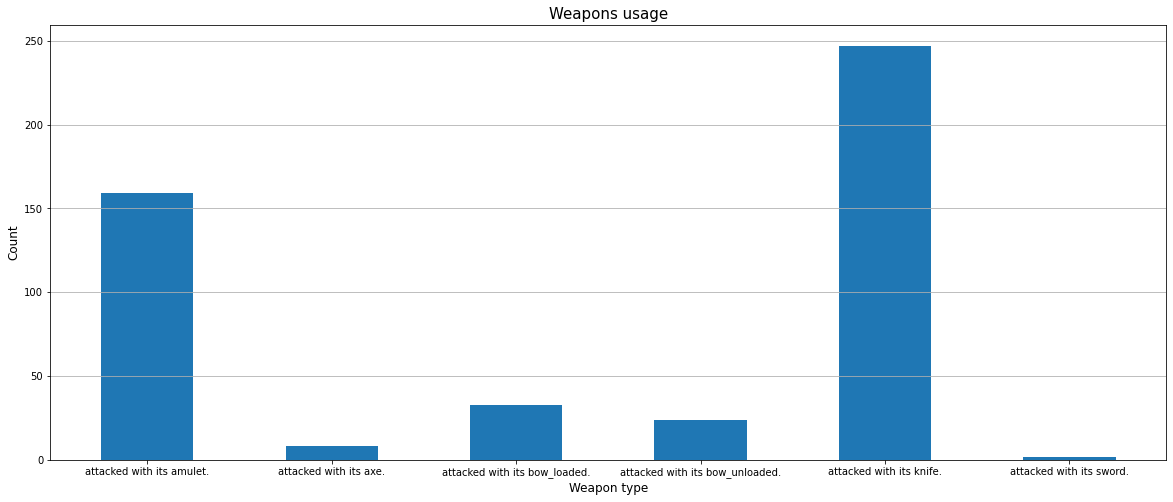

In [368]:
fig, ax = plt.subplots(figsize=(20,8))

ax.bar(barabasz_log_df[mask]['log'], barabasz_log_df[mask]["count"], width=0.5)

ax.set_xlabel("Weapon type",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
ax.set_title("Weapons usage", fontsize=15)
ax.grid(axis='y')
plt.show()


                           log  count
848        picked up a amulet.      8
849           picked up a axe.     21
850    picked up a bow_loaded.     11
851  picked up a bow_unloaded.     11
852         picked up a knife.    221
853         picked up a sword.     18


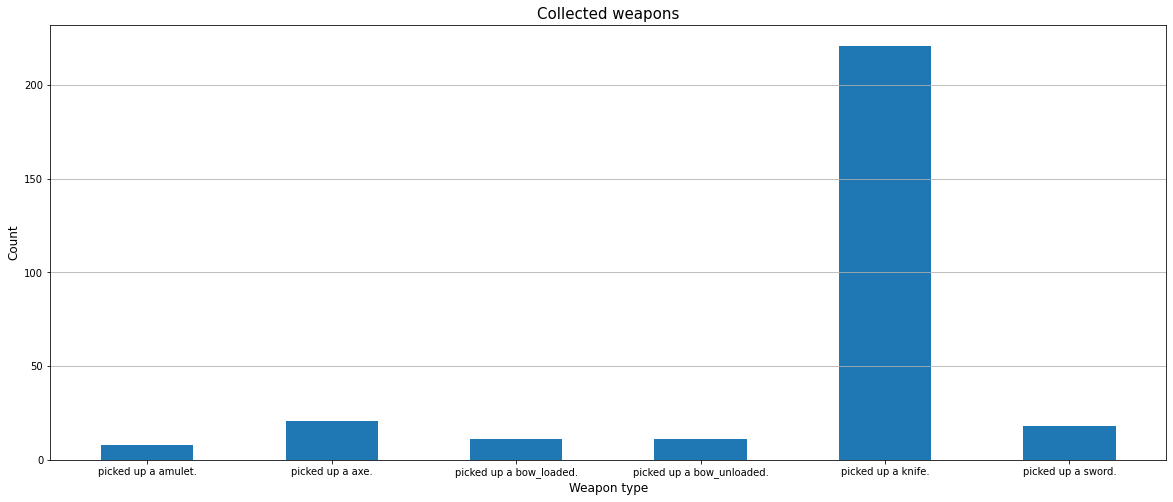

In [369]:
fig, ax = plt.subplots(figsize=(20,8))

pickedup_mask = barabasz_log_df['log'].str.contains('picked up')
ax.bar(barabasz_log_df[pickedup_mask]['log'], barabasz_log_df[pickedup_mask]["count"], width=0.5)

ax.set_xlabel("Weapon type",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
ax.set_title("Collected weapons", fontsize=15)
ax.grid(axis='y')

print(barabasz_log_df[pickedup_mask])

plt.show()

### 3. Benadrylowy Barabasz - wounds 

Interesting finding - Barabasz takes wounds for lack of movement. However in it's current configuration it shoud not be possible since the Controller module does not allow for the "Idle" action.

In [370]:
damage_mask = barabasz_log_df['log'].str.contains('was damaged|penalised for') 

bb_tiles_df = barabasz_log_df[damage_mask]
bb_tiles_df

,log,count
843,penalised for idle time.,44
879,was damaged by deadly mist.,437
880,was damaged by weapon cut.,204


/var/folders/0j/jndg8f256sv9t35cz406vsjc0000gn/T/ipykernel_48625/3621947110.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.bar(bb_tiles_df[damage_mask]['log'], bb_tiles_df[damage_mask]["count"], width=0.5)


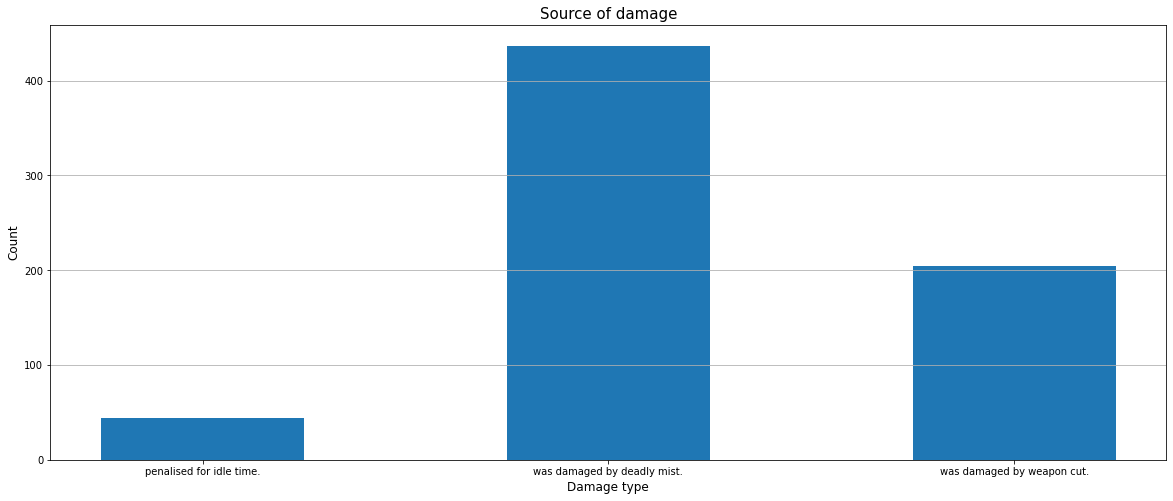

In [371]:
fig, ax = plt.subplots(figsize=(20,8))

ax.bar(bb_tiles_df[damage_mask]['log'], bb_tiles_df[damage_mask]["count"], width=0.5)

ax.set_xlabel("Damage type",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
ax.set_title("Source of damage", fontsize=15)
ax.grid(axis='y')
plt.show()